In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# __Data Prep/Exploration__
Need to inspect data and clean 

features to include:
Label - SalePrice

LotArea: Lot size in square feet   
LotFrontage: Linear feet of street connected to property  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofMatl: Roof material  
BsmtQual: Height of the basement


- lot frontage set to 0 instead of NA



(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <a list of 20 Patch objects>)

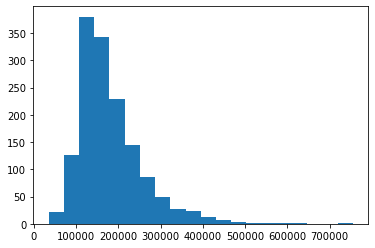

In [5]:
#set up training and test sets
#pick columns to include in training
#create models to make results

# column_values = df["HeatingQC"].values.ravel()
# unique_values =  pd.unique(column_values)
# print(unique_values)
train_data["SalePrice"].describe()
plt.hist(train_data["SalePrice"], bins=20)

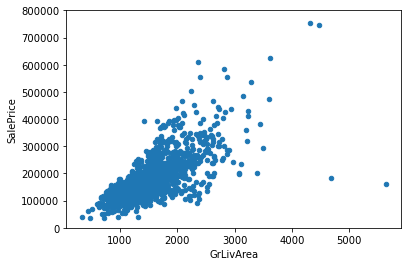

In [6]:
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

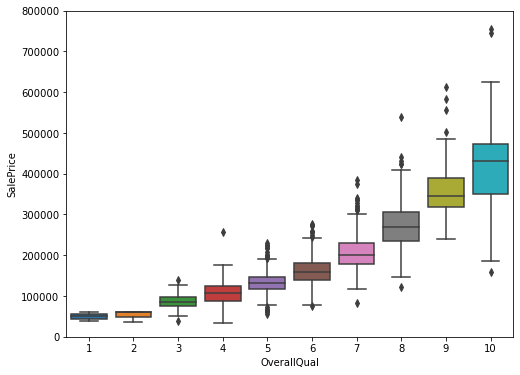

In [7]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

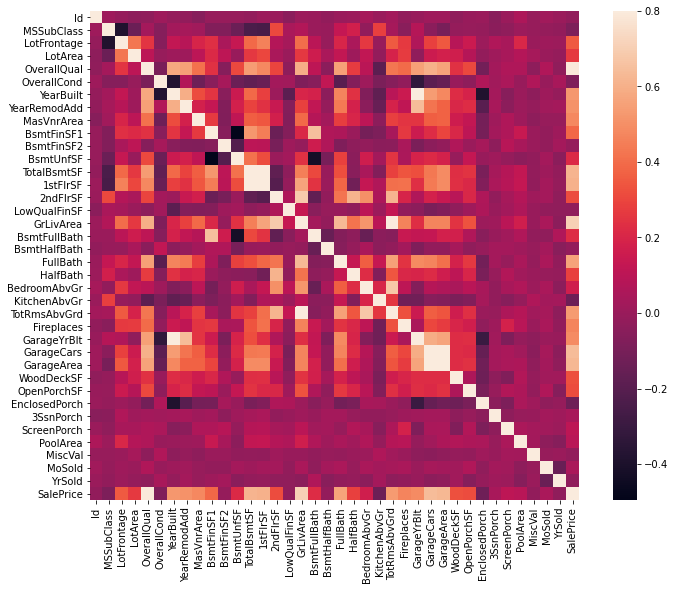

In [8]:
corr = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

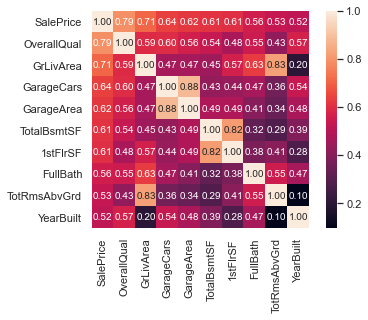

In [9]:
k = 10
cols = corr.nlargest(k, "SalePrice")["SalePrice"].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

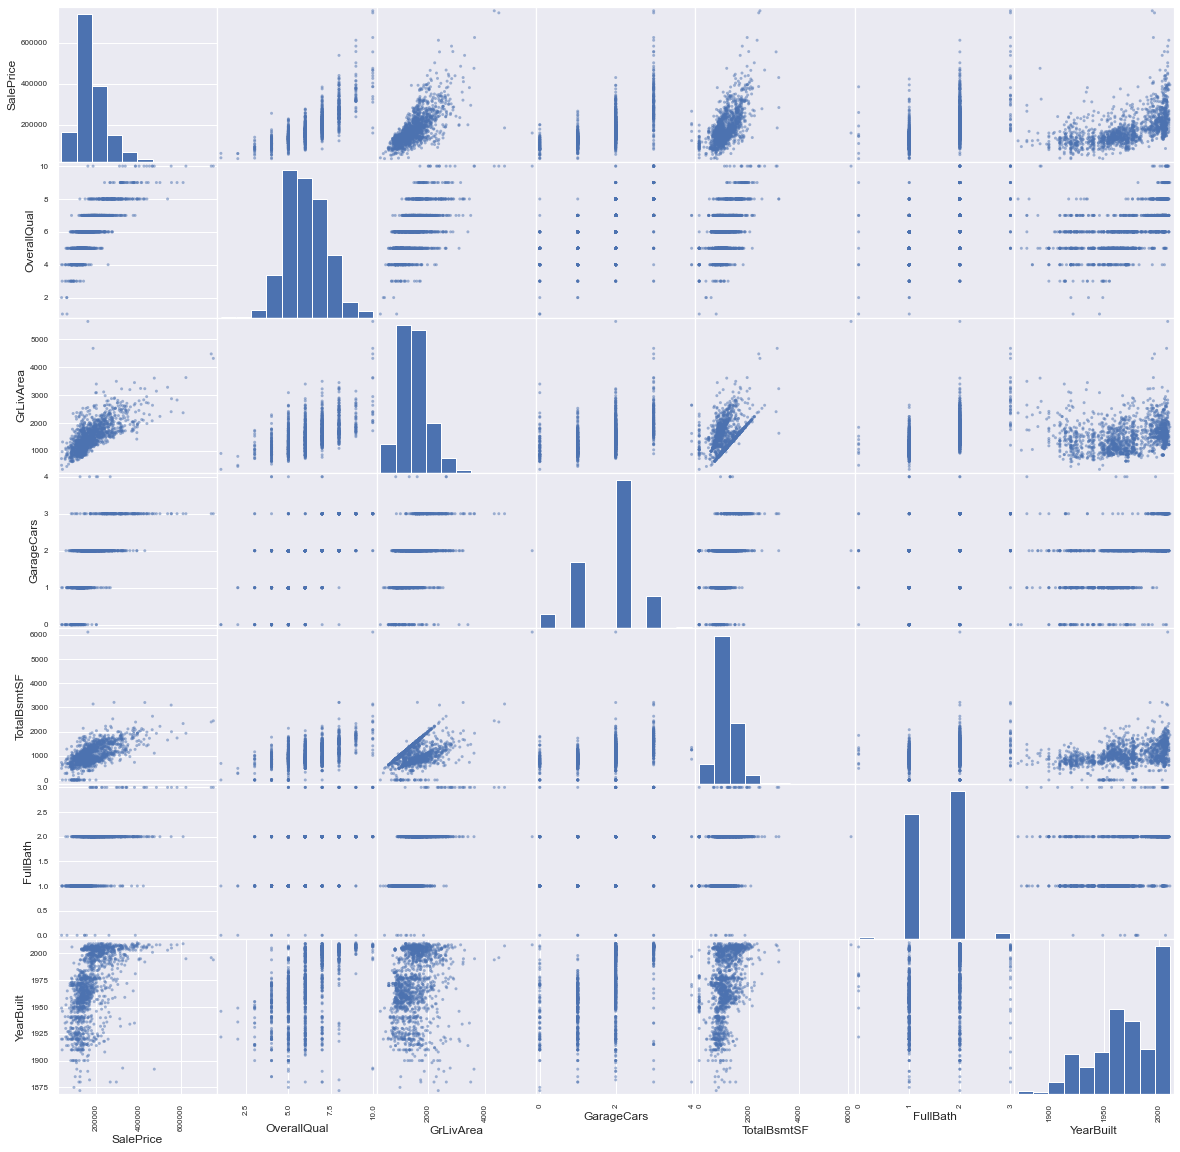

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
matrix1 = pd.plotting.scatter_matrix(train_data[cols], figsize=(20,20))


In [11]:
#Handle outliers
train_data.sort_values(by='GrLivArea', ascending=False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

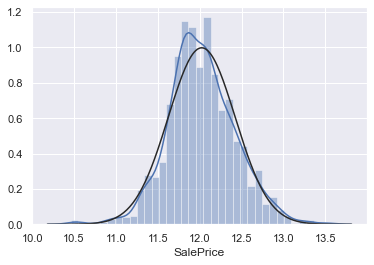

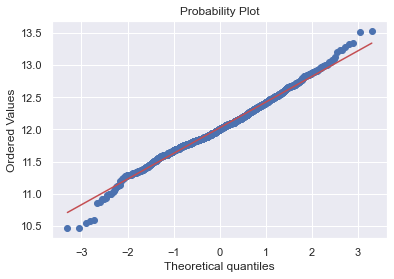

In [12]:
#normalize data
train_data["SalePrice"] = np.log(train_data["SalePrice"]) 
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

train_data['GrLivArea'] = np.log(train_data['GrLivArea'])

C:\Users\Derrin Ngo\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


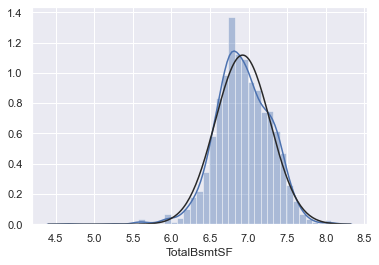

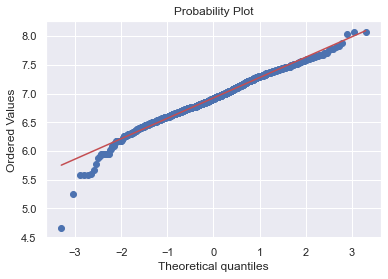

In [13]:
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])
# column_values = train_data['TotalBsmtSF'].values.ravel()
# unique_values =  pd.unique(column_values)
# print(unique_values)
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [14]:
train_data = pd.get_dummies(train_data)

In [15]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
data_to_train = train_data[cols]
data_to_train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,12.247694,7,7.444249,2,6.752270,2,2003
1,12.109011,6,7.140453,2,7.140453,2,1976
2,12.317167,7,7.487734,2,6.824374,2,2001
3,11.849398,7,7.448334,3,6.628041,1,1915
4,12.429216,8,7.695303,3,7.043160,2,2000


In [16]:
data_Y = data_to_train['SalePrice']
data_X = data_to_train.drop(['SalePrice'], axis=1)

In [17]:
X_train, X_test, Y_train, Y_test  = train_test_split(data_X, data_Y, test_size=0.20)

In [18]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

#Ridge regression makes coefficients smaller and reduces model complexity and multi-collinearity
rr = Ridge(alpha = 0.01)
rr.fit(X_train, Y_train)

Ridge(alpha=0.01)

In [19]:
train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)
Ridge_train_score = rr.score(X_train,Y_train)
Ridge_test_score = rr.score(X_test, Y_test)

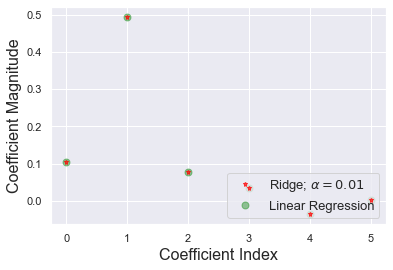

In [20]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [21]:
#https://www.kaggle.com/apapiu/regularized-linear-models
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5))
model_ridge = Ridge()

Text(0, 0.5, 'rmse')

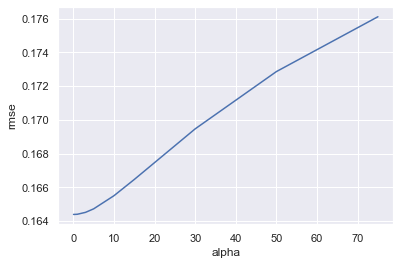

In [22]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")

In [23]:
cv_ridge.min()
#best alpha is 0 because features already picked and transformed, so regular linear regression is the same

0.16438766041685535

In [24]:
#Only difference between ridge and lasso is lasso takes into account the magnitude instead of the square.
#Can lead to 0 coefficients which provides feature selection 
model_lasso = LassoCV(alphas=[1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)

In [25]:
print("mean squared error: "+str(rmse_cv(model_lasso).mean()))
#already picked features so not better than ridge
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

mean squared error: 0.16441460592626483
Lasso picked 6 variables and eliminated the other 0 variables


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


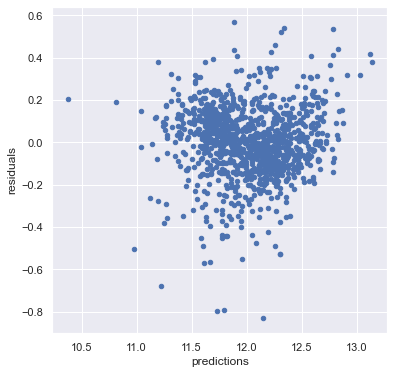

In [26]:
#residual plot
plt.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"predictions":model_lasso.predict(X_train), "actual": Y_train})
preds["residuals"] = preds["actual"]-preds["predictions"]
preds.plot(x = "predictions", y = "residuals",kind = "scatter")

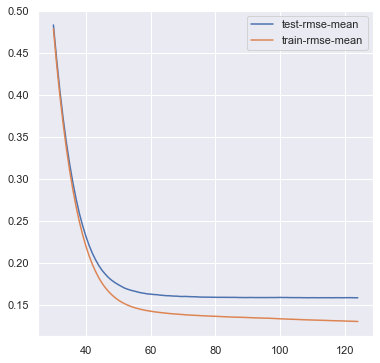

In [27]:
'''https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=XGBoost%20is%20a%20decision%2Dtree,images%2C%20text%2C%20etc.)
&text=A%20wide%20range%20of%20applications,and%20user%2Ddefined%20prediction%20problems.

xgboost - decision tree-based ensemble machine learning algorithm that uses gradient boosting framework
Decision Trees - Graphical representation of possible solutions to a decision based on certain conditions
Bagging - Boostrap aggregating, ensemble meta-algorithm combining predictions from multipl-decision trees
          through a majority of voting mechanism
Random Forest - Bagging based algorithm where only a subset of features are selected at random to build a
                forest or collection of decision trees
Boosting - Models are built sequentially by minimizing errors from previous models while increasing influence
           of high-performing models
Gradient Bossting - gradient descent algorithm to minimize errors in sequential models

XGBoost optimizations:
 - Parallelization: outer loop enumerates leaf nodes of a tree and second inner loop calculates features.
   nesting loops limits outer loop bc cannot be run until inner loop finishes. To improve run time, order
   of loops is interchanged
 - Tree Pruning: uses 'max_depth' parameter and starts pruning trees backwards
 - Regularization: penalizes more complex methods through Lasso and Ridge regularization to prevent overfitting
 - Sparsity Awareness: XGBoost admits sparse features by automatically learning best missing value
 - Weighted Quantile Sketch: XGBoost finds the optimal split points among weighted datasets
 - Cross-Validation: built-in cross validation method at each iteration
'''
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


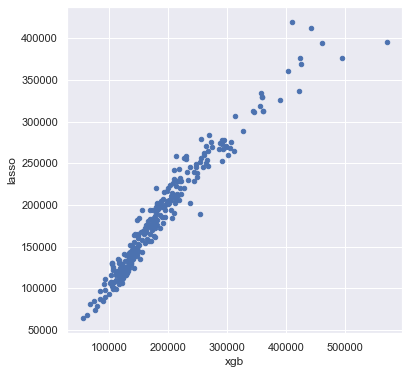

In [28]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
model_xgb.fit(X_train, Y_train)

xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [29]:
import pickle

pickle.dump(model_xgb, open("../FlaskAPI/models/XGBmodel", 'wb'))

In [97]:
X_train.head(1)
# np.exp(Y_train.head(1))
# np.expm1(model_xgb.predict(pd.DataFrame({'OverallQual': 5, 'GrLivArea': 7.109879, 'GarageCars': 2,'TotalBsmtSF': 6.990257, 'FullBath': 0 , 'YearBuilt': 1979}, index=[0])))

array([147986.97], dtype=float32)